### data import, transformations, convolution
#### author : Anirudh Putrevu       

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import random
from tensorflow import keras
import tensorflow as tf

#### LOADING color and depth images

In [34]:
#Loading RGB and DEPTH FILES      ************* change path to your file
# https://www.kaggle.com/kmader/showing-the-rgbd-images/notebook data download link through kaggle nb

b =  {toggle}np.load('/Users/anirudhputrevu/Downloads/depth_training_data.npz')
print(b.files)
data_rgb = b['rgb_images']                # RGB DATA 
data_depth = b['depth_maps']              # DEPTH DATA 
print("data rgb shape", data_rgb.shape)
print("data depth shape", data_depth.shape)

['rgb_images', 'depth_maps']
data rgb shape (3500, 3, 96, 96)
data depth shape (3500, 1, 96, 96)


1.  data of 3500 images 
2. rgb data has 3500 rgb images over 3 channels red,green,blue
3. depth data has 3500 images w/ depth values (time of flight) for each pixel over single channel.
4. rows,columns in ndarrays are 96 x 96 pixels data

#### Normalization 

In [3]:
#Normalizing the data
# 1) rgb data
print("data_rgb min",data_rgb.min())
print("data_rgb max",data_rgb.max())
data_rgb = data_rgb/255
np.mean(data_rgb)
print("new data_rgb min",data_rgb.min())
print("new data_rgb max",data_rgb.max())

# 2) depth data
print("data_depth.min",data_depth.min()) 
print("data_depth.max",data_depth.max()) 
data_depth = data_depth - data_depth.min()
print("new data_depth.min",data_depth.min()) 
print("new data_depth.max",data_depth.max())  

data_rgb min 0
data_rgb max 255
new data_rgb min 0.0
new data_rgb max 1.0
data_depth.min -1.0
data_depth.max 0.20445603
new data_depth.min 0.0
new data_depth.max 1.2044561


In [4]:
data_rgb = data_rgb.astype(np.float32)       # size(type) modification for nn 
data_depth = data_depth.astype(np.float32)

In [5]:
# switch axes for plotting
data_rgb = data_rgb.transpose(0,2,3,1)
data_depth = data_depth.transpose(0,2,3,1)

In [6]:
print("rgb data shape",data_rgb.shape)
print("depth data shape",data_depth.shape)

rgb data shape (3500, 96, 96, 3)
depth data shape (3500, 96, 96, 1)


#### Showing images 

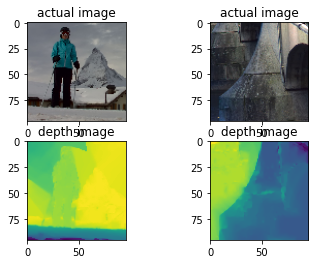

In [7]:
# printing out some data 
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(data_rgb[2900])
axarr[0,1].imshow(data_rgb[320])
axarr[0,0].set_title('actual image')
axarr[1,0].set_title('depth image')
axarr[0,1].set_title('actual image')
axarr[1,1].set_title('depth image')
axarr[1,0].imshow(data_depth[2900])
axarr[1,1].imshow(data_depth[320])

#### Shuffling images

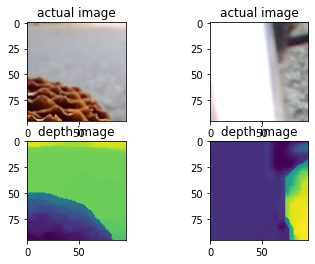

In [10]:
# shuffle images
random.seed(40)
random.shuffle(data_depth)     # inplace method
random.seed(40)
random.shuffle(data_rgb)
# checking image shuffling using same image numbers as above
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(data_rgb[2900])
axarr[0,1].imshow(data_rgb[320])
axarr[0,0].set_title('actual image')
axarr[1,0].set_title('depth image')
axarr[0,1].set_title('actual image')
axarr[1,1].set_title('depth image')
axarr[1,0].imshow(data_depth[2900])
axarr[1,1].imshow(data_depth[320])

#### ndarray transformation to 2d 

In [13]:
# simple flattening of data for model fit (models in sklearn except nn don't allow ndarray inputs)

X = data_rgb.reshape(data_rgb.shape[0],27648)         # flatten (3500, 96x96x3)
Y = data_depth.reshape(data_depth.shape[0],9216)             # (3500, 96x96x1)

In [14]:
#Splitting data into train and test dataset
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.20, random_state = 38)

In [16]:
print("x_train shape",x_train.shape)
print("y_train shape",y_train.shape)
print("x_test shape",x_test.shape)
print("y_test shape",y_test.shape)

x_train shape (2800, 27648)
y_train shape (2800, 9216)
x_test shape (700, 27648)
y_test shape (700, 9216)


#### CONVOLUTION

In [18]:
######## applying layered filtering to obtain features for x . (n filters, 3x3 kernel)


input_shape = data_rgb.shape
# no padding, strides default
x = data_rgb
y = tf.keras.layers.Conv2D(128, 3, activation='relu', input_shape=input_shape[1:])(x)
x_f = tf.keras.layers.MaxPool2D()(y)
x_f.shape
y1 = tf.keras.layers.Conv2D(96, 3, activation='relu')(x_f)
y1.shape
x_ff = tf.keras.layers.MaxPool2D()(y1)
x_ff.shape
y11 = tf.keras.layers.Conv2D(96, 3, activation='relu')(x_ff)
y11.shape
x_fff = tf.keras.layers.MaxPool2D()(y11)
x_fff.shape

x_fff = tf.keras.layers.GlobalAveragePooling2D()(x_fff) 
print("X convoluted :",x_fff.shape)

X convoluted : (3500, 96)


In [36]:
#Splitting X convoluted data into train and test dataset
print("X convoluted variable type:",type(x_fff))
xnew = x_fff.numpy()        # tensor to numpy                             
print("X convoluted is now ndarray w/ shape",xnew.shape,",",type(xnew))
xc_train, xc_test = train_test_split(xnew, test_size= 0.20, random_state = 47)
print("xconv train shape",xc_train.shape)
print("xconv test shape", xc_test.shape)

X convoluted variable type: <class 'tensorflow.python.framework.ops.EagerTensor'>
X convoluted is now ndarray w/ shape (3500, 96) , <class 'numpy.ndarray'>
xconv train shape (2800, 96)
xconv test shape (700, 96)


In [40]:
colorimg_train, colorimg_test = train_test_split(data_rgb, test_size= 0.20, random_state = 47)
print("<storing color img data for comparison later>")

<storing color img data for comparison later>


note: simple flattening results in large feature size, viz. 27648 features. Moreover, flattening the data leads to loss of relations between neighboring pixels which is essential for any good model. To elaborate on this, if we look at the pine cone above, as the pixel values change from the pine cone to the road, a good model would look at the neighboring pixels in the 96x96 matrix and their depth values to find a big change in the objects road and the pine. This information helps the model to learn to separate objects better, by looking at the pixels around the pixel it is currently training on. Once this matrix is flattened the data is still stored but the pixels are no more next to each other, hence the model loses some ability. 

Convolution here significantly reduces the model feature size, preserving this neighbour information as we pass the input through a kernel window and pool the new low-dimension values, obtaining a single value that represents a group of neighbor-pixels. 
